In [1]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv

In [13]:
load_dotenv()
API_KEY = "cH2rbrRMzTedExBIE6okFZvmLQCkpjmys1rjwiVY"

In [14]:
print(API_KEY)

cH2rbrRMzTedExBIE6okFZvmLQCkpjmys1rjwiVY


In [ ]:
def get_data(api_key=API_KEY, series_id=None, start_date=None, end_date=None, interval='monthly'):
    url = f"https://api.eia.gov/v2/petroleum/crd/crpdn/data/?api_key={api_key}&start{start_date}&frequency={interval}"

    r = requests.get(url)
    data = r.json()

    #data = data['series'][0]['data'][0]
    return data

In [ ]:
#start day = today - 1 year
start_date = '2022-01'

data = get_data(series_id='PET.WPRODUC.WORLD-PETRO.M',start_date=start_date ,interval='monthly')

In [ ]:
data

In [3]:
url = f"https://api.eia.gov/v2/petroleum/?api_key={API_KEY}"
r = requests.get(url)
data = r.json()

In [4]:
data

{'error': {'code': 'API_KEY_INVALID',
  'message': 'An invalid api_key was supplied. Get one at https://api.eia.gov:443'}}

In [ ]:
frequency = 'monthly'
url = f"https://api.eia.gov/v2/petroleum/crd/crpdn/data/?api_key={API_KEY}&\
frequency={frequency}&start=2015-12&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0"
r = requests.get(url)
data = r.json()

In [ ]:
data = data['response']['data']

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
df['barrels_per_month'] = df.apply(lambda x: int(x['value'])*30 if x['units'] == 'MBBL/D' else int(x['value']), axis=1)

In [ ]:
df['period'] = pd.to_datetime(df['period'])

In [ ]:
df = df.set_index('period')

In [ ]:
df_MBBL = df['barrels_per_month']

In [ ]:
df_MBBL = df_MBBL.groupby('period').sum()

In [ ]:
df_MBBL = df_MBBL.sort_index(ascending=False)

In [ ]:
df_MBBL

In [15]:
url = f"https://api.eia.gov/v2/petroleum/stoc/cu/data/?api_key={API_KEY}&\
    frequency={frequency}&start=2015-12&data[0]=value&sort[0][column]=period&\
    sort[0][direction]=desc&offset=0"

r = requests.get(url)
data = r.json()

data = data['response']['data']

NameError: name 'frequency' is not defined

In [ ]:
df = pd.DataFrame(data)
df['period'] = pd.to_datetime(df['period'])
df = df.set_index('period')

In [ ]:
storage_data = df['value']
storage_data = storage_data.groupby('period').sum()
storage_data = storage_data.sort_index(ascending=False)

In [ ]:
storage_data = storage_data.rename('storage')


In [ ]:
#merge storage_data and df_MBBL on period
df = pd.merge(df_MBBL, storage_data, on='period')

In [ ]:
df_change = df.diff(periods=-1)
#plot df_change as line
df_change.plot.line()

In [ ]:
df.plot.line()

In [16]:
url = f"https://api.eia.gov/v2/petroleum/move/exp/data/?api_key={API_KEY}&\
    frequency=monthly&data[0]=value&facets[product][]=EP00&\
    facets[product][]=EPC0&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

r = requests.get(url)
data = r.json()


In [17]:
data

{'response': {'warnings': [{'warning': 'incomplete return',
    'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}],
  'total': 14406,
  'dateFormat': 'YYYY-MM',
  'frequency': 'monthly',
  'data': [{'period': '2023-02',
    'duoarea': 'NUS-Z00',
    'area-name': 'U.S.',
    'product': 'EPC0',
    'product-name': 'Crude Oil',
    'process': 'EEX',
    'process-name': 'Exports',
    'series': 'MCREXUS1',
    'series-description': 'U.S. Exports of Crude Oil (Thousand Barrels)',
    'value': 111935,
    'units': 'MBBL'},
   {'period': '2023-02',
    'duoarea': 'NUS-Z00',
    'area-name': 'U.S.',
    'product': 'EPC0',
    'product-name': 'Crude Oil',
    'process': 'EEX',
    'process-name': 'Exports',
    'series': 'MCREXUS2',
    'series-description': 'U.S. Exports of Crude Oil (Thousand Barrels per Day)',
    'value': 3998,
    'units': 'MBBL/D'},
   {'period': '2

In [43]:
url = f"https://api.eia.gov/v2/petroleum/move/wkly/data/?api_key={API_KEY}&\
frequency=weekly&data[0]=value&facets[product][]=EPC0&facets[process][]=EEX&\
facets[process][]=IM0&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

In [44]:
r = requests.get(url)

In [45]:
data = r.json()

In [46]:
data = data['response']['data']

In [47]:
df = pd.DataFrame(data)

In [48]:
df['period'] = pd.to_datetime(df['period'])

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2023-04-28,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6396,MBBL/D
1,2023-04-28,NUS-Z00,U.S.,EPC0,Crude Oil,EEX,Exports,WCREXUS2,U.S. Exports of Crude Oil (Thousand Barrels pe...,4737,MBBL/D
2,2023-04-21,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6376,MBBL/D
3,2023-04-21,NUS-Z00,U.S.,EPC0,Crude Oil,EEX,Exports,WCREXUS2,U.S. Exports of Crude Oil (Thousand Barrels pe...,4819,MBBL/D
4,2023-04-14,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6294,MBBL/D
...,...,...,...,...,...,...,...,...,...,...,...
3416,1990-02-02,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6761,MBBL/D
3417,1990-01-26,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6144,MBBL/D
3418,1990-01-19,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6463,MBBL/D
3419,1990-01-12,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,6644,MBBL/D


In [49]:
df = df.set_index('period')

In [51]:
exports = df[df['process-name'].str.contains('exports', case=False)]['value'].rename('exports')
imports = df[df['process-name'].str.contains('imports', case=False)]['value'].rename('imports')

In [52]:
merged = pd.merge(exports, imports, on='period')
merged['diff'] = merged['exports'] - merged['imports']

<AxesSubplot:xlabel='period'>

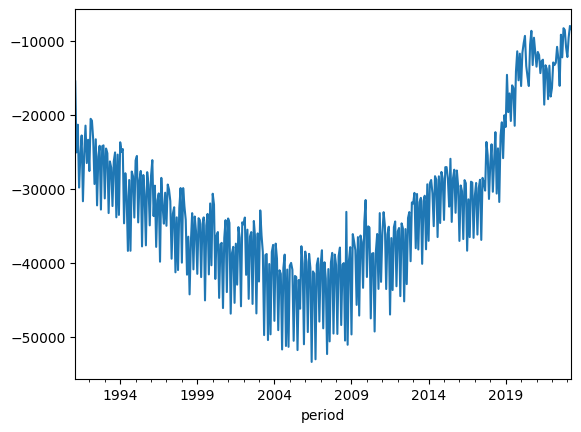

In [55]:
merged['diff'].resample('M').sum().plot.line()